<a href="https://colab.research.google.com/github/don1504/automoblile/blob/main/0717_yolov8_%EB%8F%99%EC%98%81%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

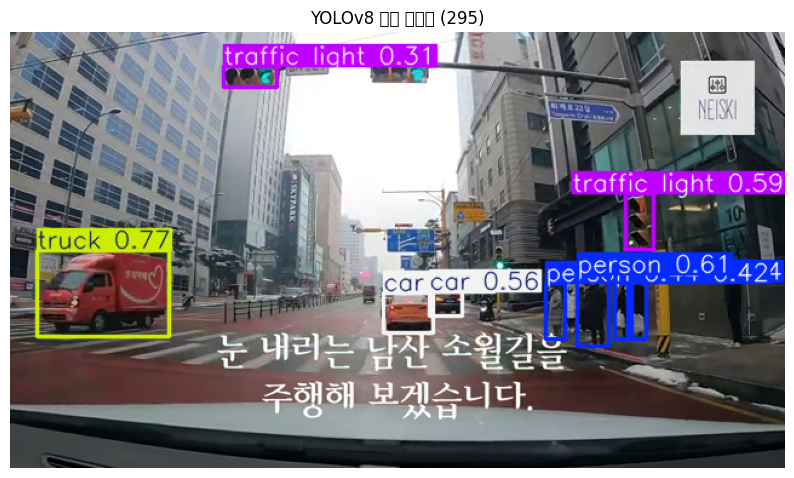

✅ 영상 추론 종료, 저장 파일: output_with_yolo.mp4


In [33]:
import tempfile
import cv2
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ultralytics import YOLO
from IPython.display import Video

# 모델 로드 (YOLOv8n - 경량 모델)
model = YOLO("yolov8n.pt")

def play_and_save_youtube_with_yolo(youtube_url, skip_frames=5, output_filename="output_with_yolo.mp4", max_duration=30):
    """
    max_duration: 최대 처리 시간(초)
    """
    try:
        import yt_dlp  # 함수 안으로 이동해 느린 import 시 사용자 중단 방지

        ydl_opts = {
            'format': 'mp4/best[height<=480]',
            'outtmpl': tempfile.gettempdir() + '/temp_video.%(ext)s',
            'quiet': True,
        }

        print("⬇️ 유튜브 영상 다운로드 준비 중... (최대 1분 소요 가능)")
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(youtube_url, download=True)
            video_path = ydl.prepare_filename(info)

            print(f"🎥 영상 제목: {info['title']}")

            cap = cv2.VideoCapture(video_path)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

            max_frames = int(fps * max_duration)
            print(f"⏱ 최대 {max_duration}초 (약 {max_frames} 프레임) 처리")

            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_filename, fourcc, fps / skip_frames, (frame_width, frame_height))

            frame_num = 0

            while True:
                ret, frame = cap.read()
                if not ret or frame_num >= max_frames:
                    break

                if frame_num % skip_frames == 0:
                    results = model.predict(frame, imgsz=640, verbose=False)[0]
                    annotated_frame = results.plot()
                    out.write(annotated_frame)

                    clear_output(wait=True)
                    plt.figure(figsize=(10, 6))
                    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
                    plt.title(f"YOLOv8 추론 프레임 ({frame_num})")
                    plt.axis('off')
                    plt.show()

                    time.sleep(0.1)

                frame_num += 1

            cap.release()
            out.release()
            os.remove(video_path)
            print(f"✅ 영상 추론 종료, 저장 파일: {output_filename}")

    except KeyboardInterrupt:
        print("⛔️ 실행이 사용자에 의해 중단되었습니다.")
    except Exception as e:
        print(f"❌ 오류 발생: {e}")

# 실행
youtube_url = input("유튜브 영상 URL 입력: ")
play_and_save_youtube_with_yolo(youtube_url, skip_frames=5, max_duration=10)


In [16]:
%pip install opencv-python-headless